In [41]:
!pip install transformers vaderSentiment textblob

In [42]:
import pandas as pd
from textblob import TextBlob
from transformers import pipeline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
file_path = '/content/drive/MyDrive/Social Media Computing/archive-3/twcs/twcs.csv'
df = pd.read_csv(file_path)

In [45]:
df.head()

tweet_id   author_id  inbound                      created_at  \
0         1  sprintcare    False  Tue Oct 31 22:10:47 +0000 2017   
1         2      115712     True  Tue Oct 31 22:11:45 +0000 2017   
2         3      115712     True  Tue Oct 31 22:08:27 +0000 2017   
3         4  sprintcare    False  Tue Oct 31 21:54:49 +0000 2017   
4         5      115712     True  Tue Oct 31 21:49:35 +0000 2017   

                                                                                                                           text  \
0     @115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.   
1                                                                                 @sprintcare and how do you propose we do that   
2                                            @sprintcare I have sent several private messages and no one is responding as usual   
3  @115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.   
4                                                                                                            @sprintcare I did.   

  response_tweet_id  in_response_to_tweet_id  
0                 2                      3.0  
1               NaN                      1.0  
2                 1                      4.0  
3                 3                      5.0  
4                 4                      6.0

In [46]:
df.shape

(2811774, 7)

In [65]:
print(df.info())

print(df.describe())

missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 8 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
 7   cleaned_tweets           object 
dtypes: bool(1), float64(1), int64(1), object(5)
memory usage: 152.8+ MB
None
           tweet_id  in_response_to_tweet_id
count  2.811774e+06             2.017439e+06
mean   1.504565e+06             1.463141e+06
std    8.616450e+05             8.665730e+05
min    1.000000e+00             1.000000e+00
25%    7.601652e+05             7.155105e+05
50%    1.507772e+06             1.439805e+06
75%    2.253296e+06             2.220646e+06
max    2.987950e+06             2.987950e+06
Missing values in each co

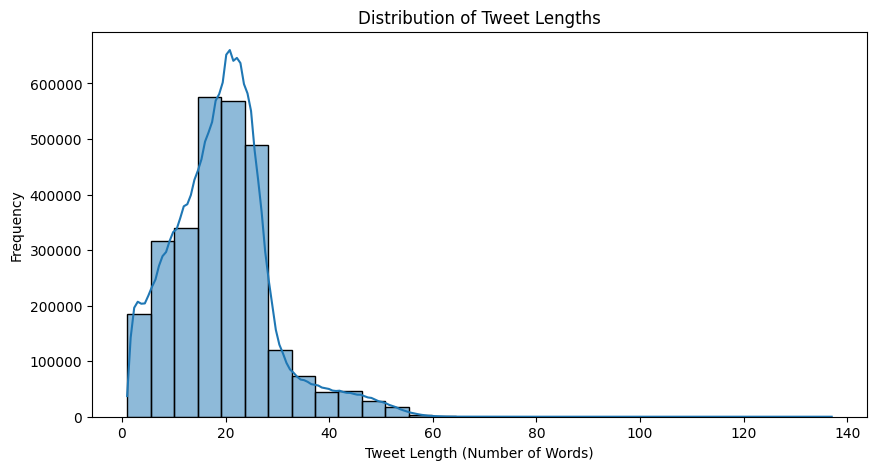

<ipython-input-66-3954cf895fb8>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='inbound', data=df, palette='viridis')


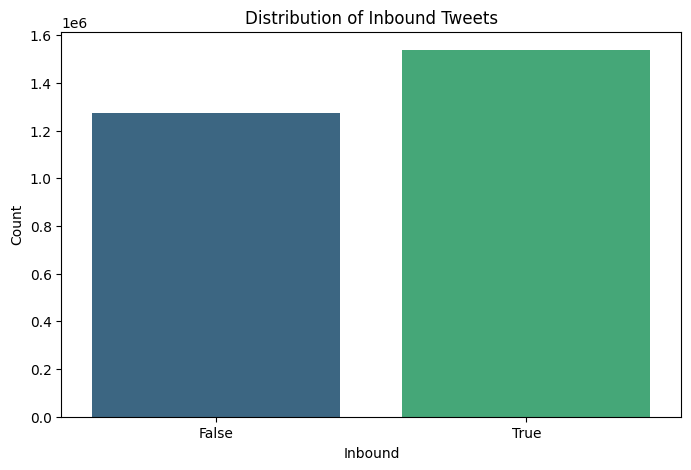

In [66]:
df['tweet_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Distribution of tweet lengths
plt.figure(figsize=(10, 5))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (Number of Words)')
plt.ylabel('Frequency')
plt.show()

# Distribution of the 'inbound' column
plt.figure(figsize=(8, 5))
sns.countplot(x='inbound', data=df, palette='viridis')
plt.title('Distribution of Inbound Tweets')
plt.xlabel('Inbound')
plt.ylabel('Count')
plt.show()

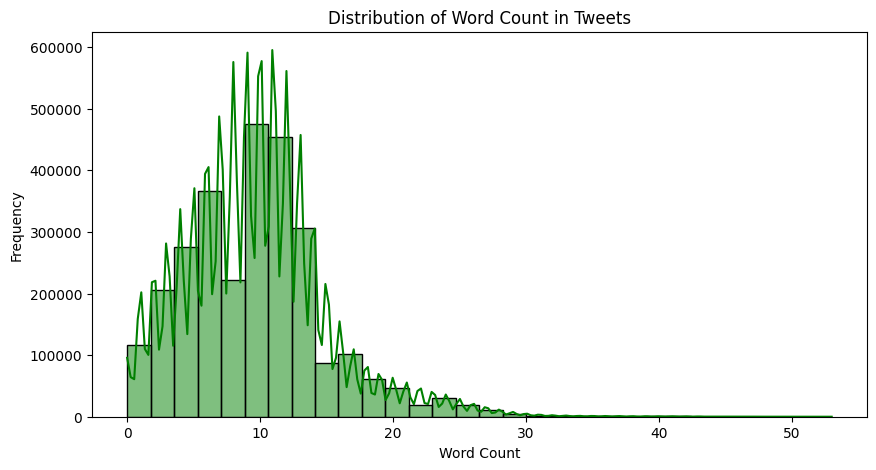

In [67]:
# Word count per tweet
df['word_count'] = df['cleaned_tweets'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Word Count in Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

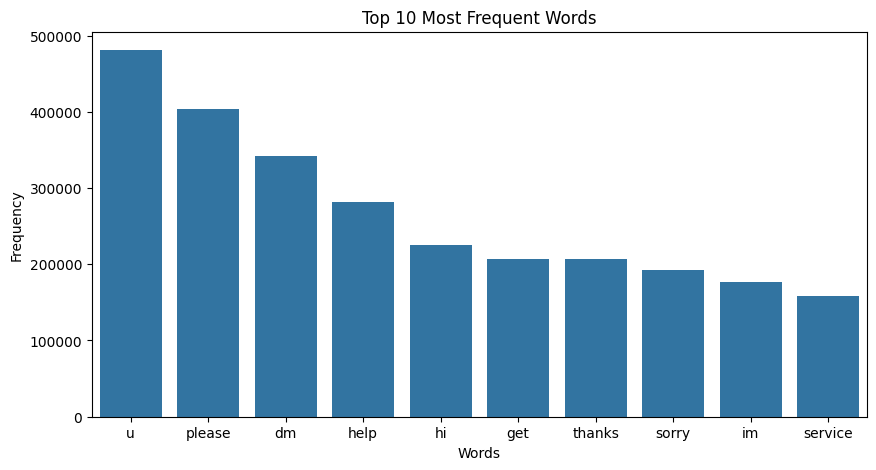

In [69]:
from collections import Counter

all_words = ' '.join(df['cleaned_tweets'])
word_counts = Counter(all_words.split())
common_words = word_counts.most_common(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=[word[0] for word in common_words], y=[word[1] for word in common_words])
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [47]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', '', text)

    # Remove mentions (@user) and hashtags (#hashtag)
    text = re.sub(r'@\w+|#', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Apply lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Reconstruct the cleaned text
    return ' '.join(words)

df['cleaned_tweets'] = df['text'].apply(preprocess_text)

In [48]:
print(df[['text', 'cleaned_tweets']].head())

                                                                                                                           text  \
0     @115712 I understand. I would like to assist you. We would need to get you into a private secured link to further assist.   
1                                                                                 @sprintcare and how do you propose we do that   
2                                            @sprintcare I have sent several private messages and no one is responding as usual   
3  @115712 Please send us a Private Message so that we can further assist you. Just click ‘Message’ at the top of your profile.   
4                                                                                                            @sprintcare I did.   

                                                            cleaned_tweets  
0  understand would like assist would need get private secured link assist  
1                                                          

In [49]:
pd.set_option('display.max_colwidth', None)

print(df['cleaned_tweets'].head(30))

0                   understand would like assist would need get private secured link assist
1                                                                                   propose
2                                         sent several private message one responding usual
3                            please send u private message assist click message top profile
4                                                                                          
5                                         please send u private message gain detail account
6                                                                    worst customer service
7                                                  saddening hear please shoot u dm look kc
8                                         gon na magically change connectivity whole family
9                        understand concern wed like please send u direct message assist aa
10                                                                since signed y

TextBlob

In [50]:
def get_textblob_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'POSITIVE'
    elif polarity < 0:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

BERT

In [51]:
def get_bert_sentiment(text):
    result = bert_model(text)[0]
    label = result['label']
    score = result['score']

    if score > 0.65:
        return 'POSITIVE' if label == 'POSITIVE' else 'NEGATIVE'
    else:
        return 'NEUTRAL'


VADER

In [52]:
vader_analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    vader_sentiment = vader_analyzer.polarity_scores(text)
    if vader_sentiment['compound'] >= 0.05:
        return 'POSITIVE'
    elif vader_sentiment['compound'] <= -0.05:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

RoBERTa

In [53]:
def get_roberta_sentiment(text):
    result = roberta_model(text)[0]
    label = result['label']

    if label == 'LABEL_0':
        return 'NEGATIVE'
    elif label == 'LABEL_1':
        return 'NEUTRAL'
    elif label == 'LABEL_2':
        return 'POSITIVE'

In [77]:
df_subset = df.head(10000)

Sentiment Analysis

In [78]:
# TextBlob sentiment analysis
df_subset['textblob_sentiment'] = df_subset['cleaned_tweets'].apply(get_textblob_sentiment)

# BERT sentiment analysis
df_subset['bert_sentiment'] = df_subset['cleaned_tweets'].apply(get_bert_sentiment)

# VADER sentiment analysis
df_subset['vader_sentiment'] = df_subset['cleaned_tweets'].apply(get_vader_sentiment)

# RoBERTa sentiment analysis
df_subset['roberta_sentiment'] = df_subset['cleaned_tweets'].apply(get_roberta_sentiment)

print(df_subset[['cleaned_tweets', 'textblob_sentiment', 'bert_sentiment', 'vader_sentiment', 'roberta_sentiment']].head(25))


<ipython-input-78-d78934ea9b5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['textblob_sentiment'] = df_subset['cleaned_tweets'].apply(get_textblob_sentiment)
<ipython-input-78-d78934ea9b5a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['bert_sentiment'] = df_subset['cleaned_tweets'].apply(get_bert_sentiment)
<ipython-input-78-d78934ea9b5a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

                                                                           cleaned_tweets  \
0                 understand would like assist would need get private secured link assist   
1                                                                                 propose   
2                                       sent several private message one responding usual   
3                          please send u private message assist click message top profile   
4                                                                                           
5                                       please send u private message gain detail account   
6                                                                  worst customer service   
7                                                saddening hear please shoot u dm look kc   
8                                       gon na magically change connectivity whole family   
9                      understand concern wed like please send u direc

<ipython-input-78-d78934ea9b5a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['roberta_sentiment'] = df_subset['cleaned_tweets'].apply(get_roberta_sentiment)


Comparison

In [79]:
sentiment_table = df_subset[['cleaned_tweets', 'textblob_sentiment', 'bert_sentiment', 'vader_sentiment', 'roberta_sentiment']]

print(sentiment_table.head(30))

                                                                           cleaned_tweets  \
0                 understand would like assist would need get private secured link assist   
1                                                                                 propose   
2                                       sent several private message one responding usual   
3                          please send u private message assist click message top profile   
4                                                                                           
5                                       please send u private message gain detail account   
6                                                                  worst customer service   
7                                                saddening hear please shoot u dm look kc   
8                                       gon na magically change connectivity whole family   
9                      understand concern wed like please send u direc

In [80]:
print(sentiment_table.tail(30))

                                                                                                                                                                              cleaned_tweets  \
9970                                                                                                                                                                      already filled one   
9971                                                                                                                                                             please check dm instruction   
9972                                                                                                   say another system activated matter try anyone ive talked tried cant get back account   
9973                                                                                                                                   sorry inconvenience see kind error message error code   
9974                                    

In [81]:
sentiment_table.to_csv('tweets_with_sentiment_from_all_models.csv', index=False)

In [82]:
df_subset['all_models_agree'] = (df_subset['textblob_sentiment'] == df_subset['bert_sentiment']) & \
                         (df_subset['textblob_sentiment'] == df_subset['vader_sentiment']) & \
                         (df_subset['textblob_sentiment'] == df_subset['roberta_sentiment'])

# Agreement rate between all models
all_models_agreement_rate = df_subset['all_models_agree'].mean() * 100

print(f'Agreement rate between all models: {all_models_agreement_rate:.2f}%')

Agreement rate between all models: 19.39%


<ipython-input-82-1eb54a8d50d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['all_models_agree'] = (df_subset['textblob_sentiment'] == df_subset['bert_sentiment']) & \


In [83]:
disagreements = df_subset[~df_subset['all_models_agree']]

print(disagreements[['cleaned_tweets', 'textblob_sentiment', 'bert_sentiment', 'vader_sentiment', 'roberta_sentiment']].head(30))

                                                                           cleaned_tweets  \
0                 understand would like assist would need get private secured link assist   
1                                                                                 propose   
2                                       sent several private message one responding usual   
3                          please send u private message assist click message top profile   
4                                                                                           
5                                       please send u private message gain detail account   
7                                                saddening hear please shoot u dm look kc   
8                                       gon na magically change connectivity whole family   
9                      understand concern wed like please send u direct message assist aa   
10                                                              since 

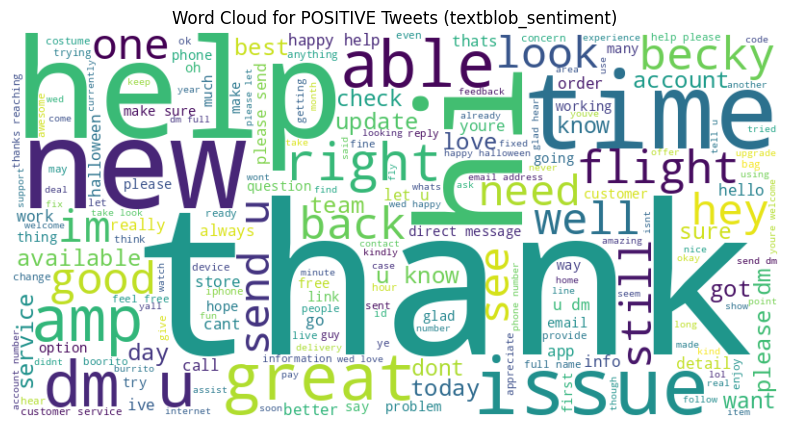

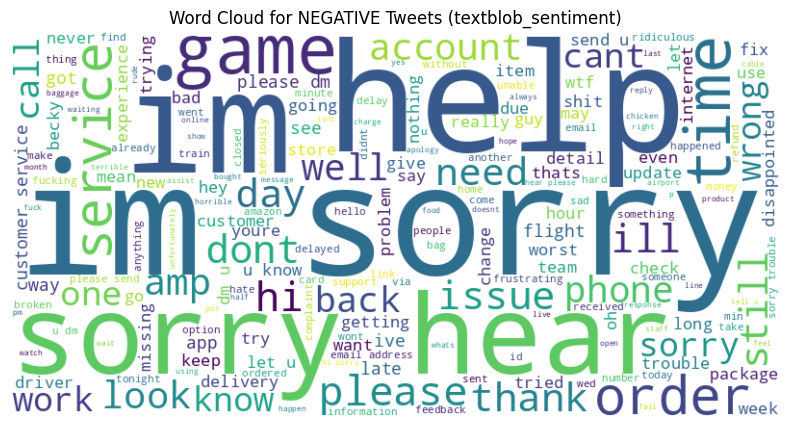

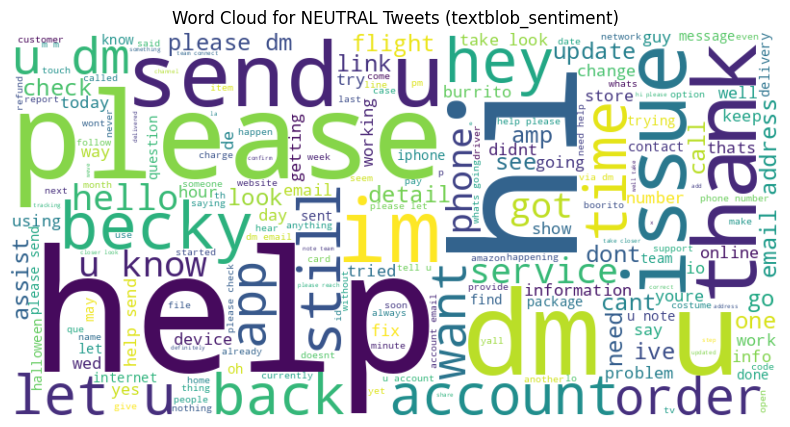

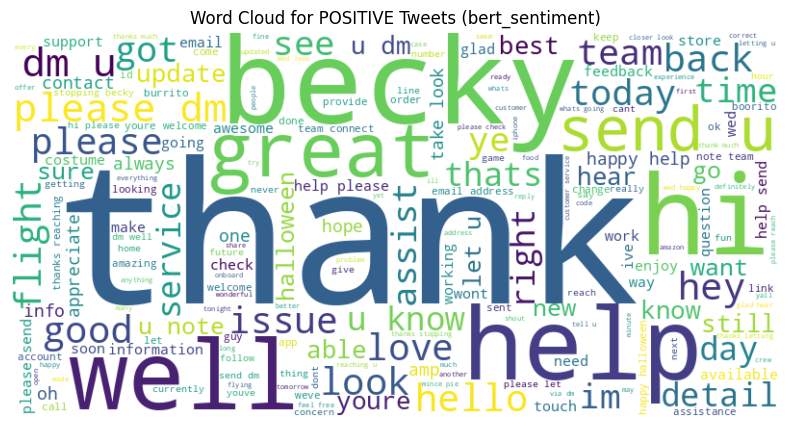

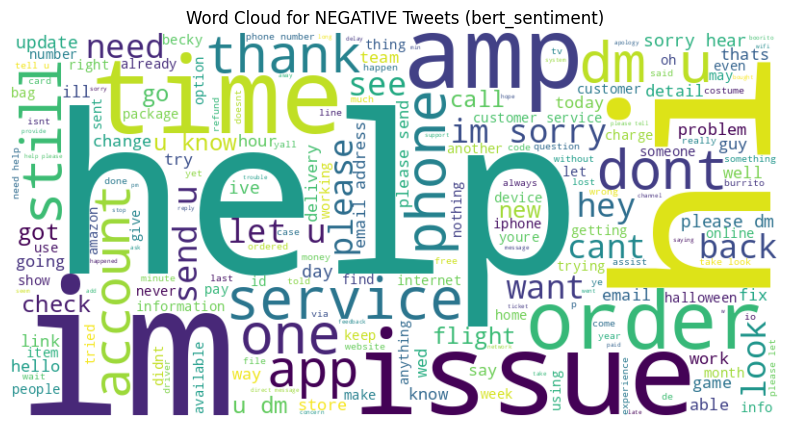

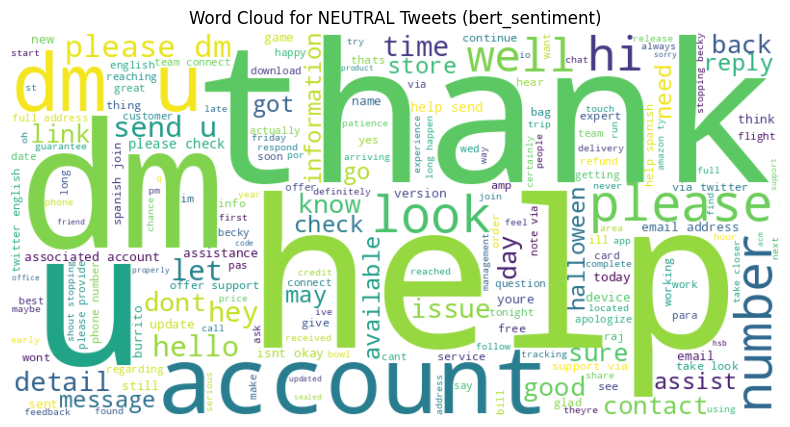

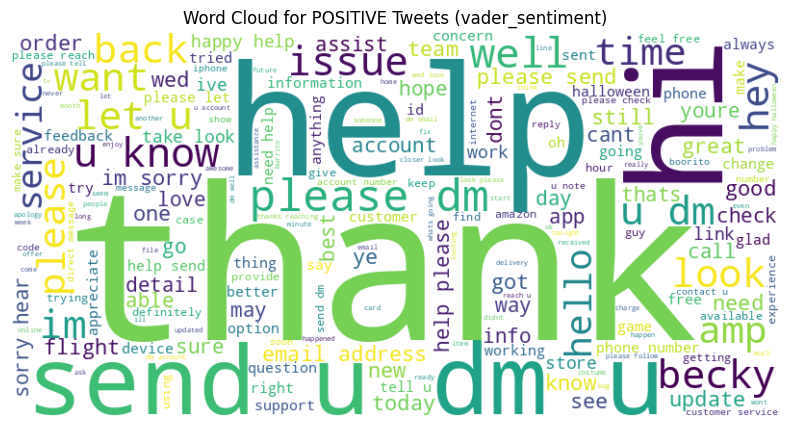

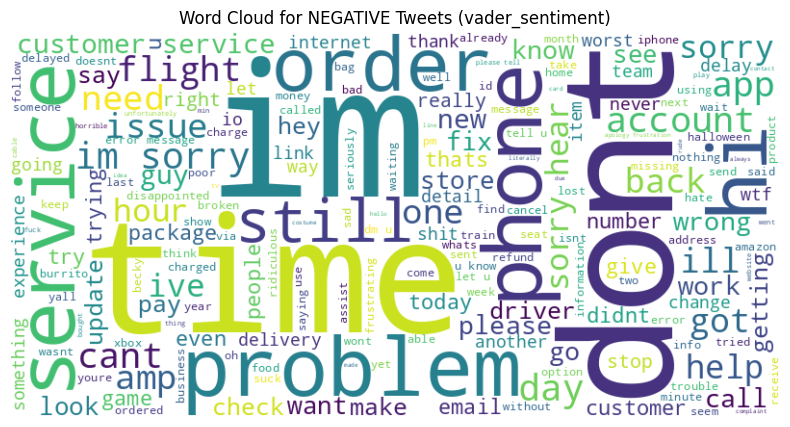

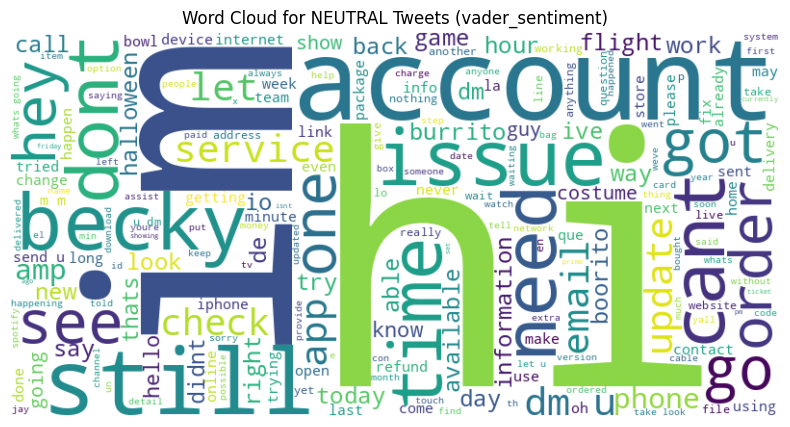

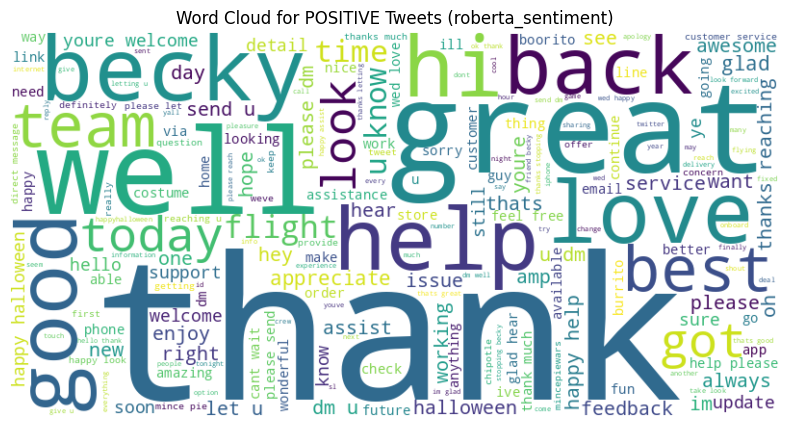

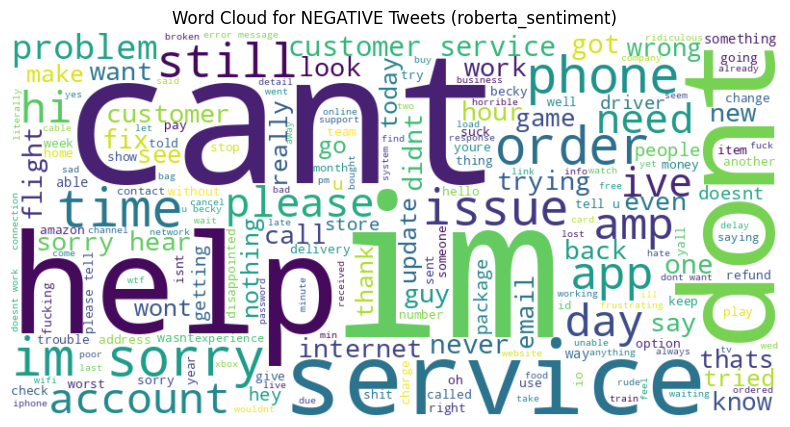

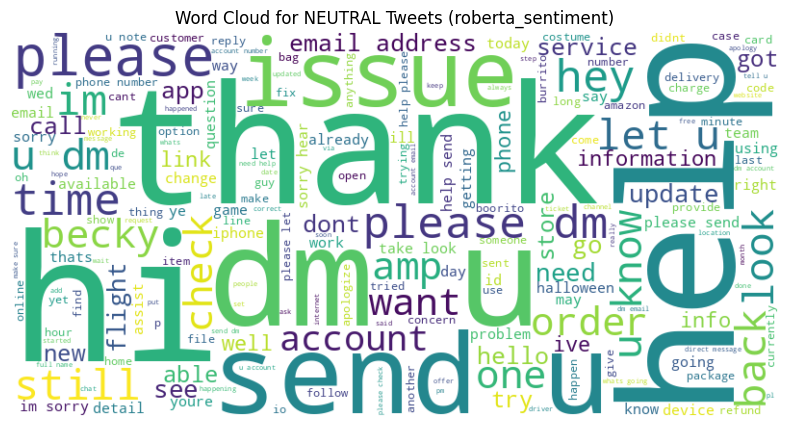

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(sentiment_df, sentiment_label, model_name):
    text = ' '.join(sentiment_df[sentiment_df[model_name] == sentiment_label]['cleaned_tweets'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_label} Tweets ({model_name})')
    plt.show()

models = ['textblob_sentiment', 'bert_sentiment', 'vader_sentiment', 'roberta_sentiment']
sentiments = ['POSITIVE', 'NEGATIVE', 'NEUTRAL']

for model in models:
    for sentiment in sentiments:
        create_wordcloud(df_subset, sentiment, model)

<ipython-input-85-89e59b877659>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=model, data=df_subset, palette='viridis')


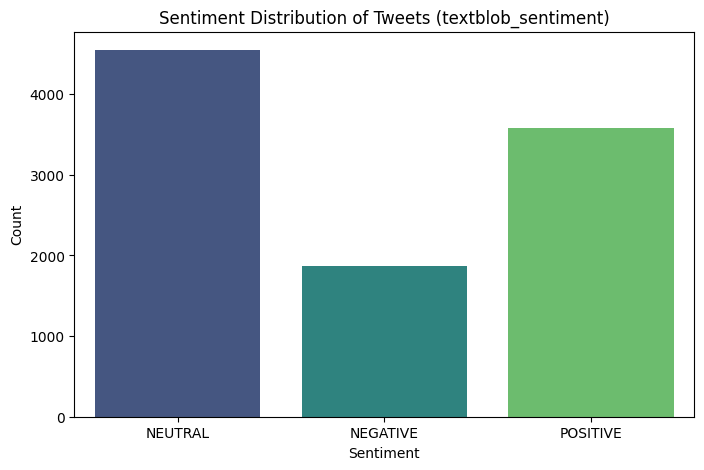

<ipython-input-85-89e59b877659>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=model, data=df_subset, palette='viridis')


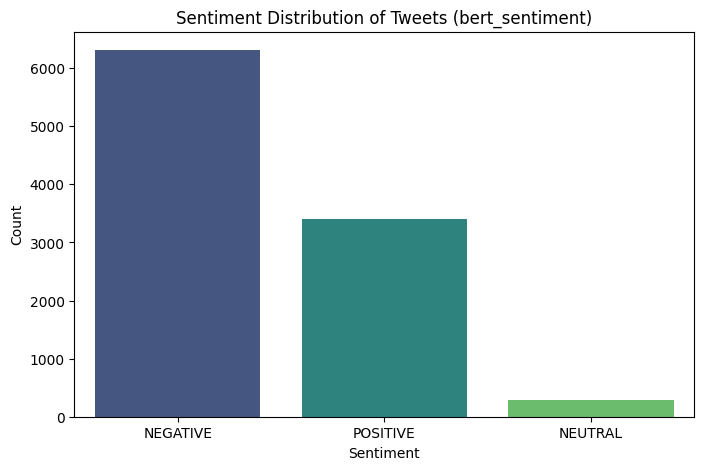

<ipython-input-85-89e59b877659>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=model, data=df_subset, palette='viridis')


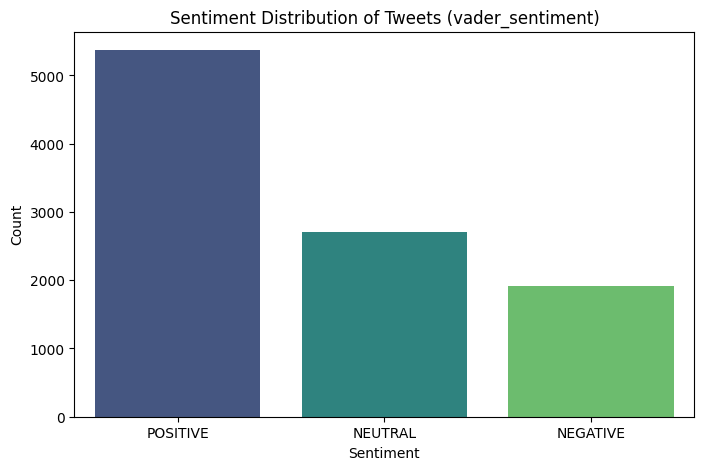

<ipython-input-85-89e59b877659>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=model, data=df_subset, palette='viridis')


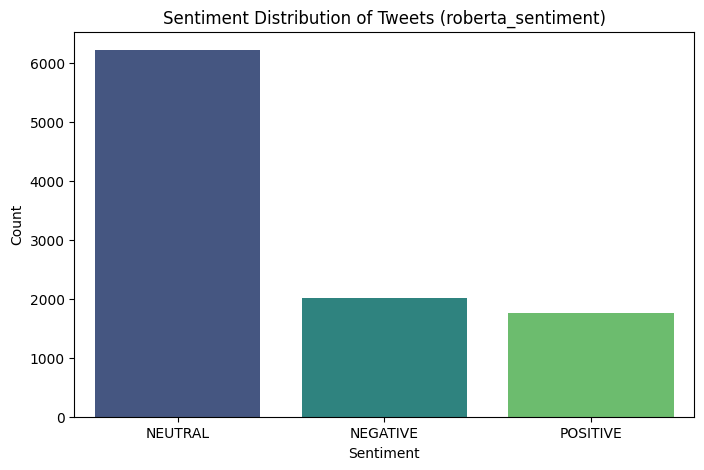

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

models = ['textblob_sentiment', 'bert_sentiment', 'vader_sentiment', 'roberta_sentiment']

for model in models:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=model, data=df_subset, palette='viridis')
    plt.title(f'Sentiment Distribution of Tweets ({model})')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

<ipython-input-86-3cd7f9318425>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['textblob_sentiment_numeric'] = df_subset['textblob_sentiment'].map(sentiment_map)
<ipython-input-86-3cd7f9318425>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['bert_sentiment_numeric'] = df_subset['bert_sentiment'].map(sentiment_map)
<ipython-input-86-3cd7f9318425>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

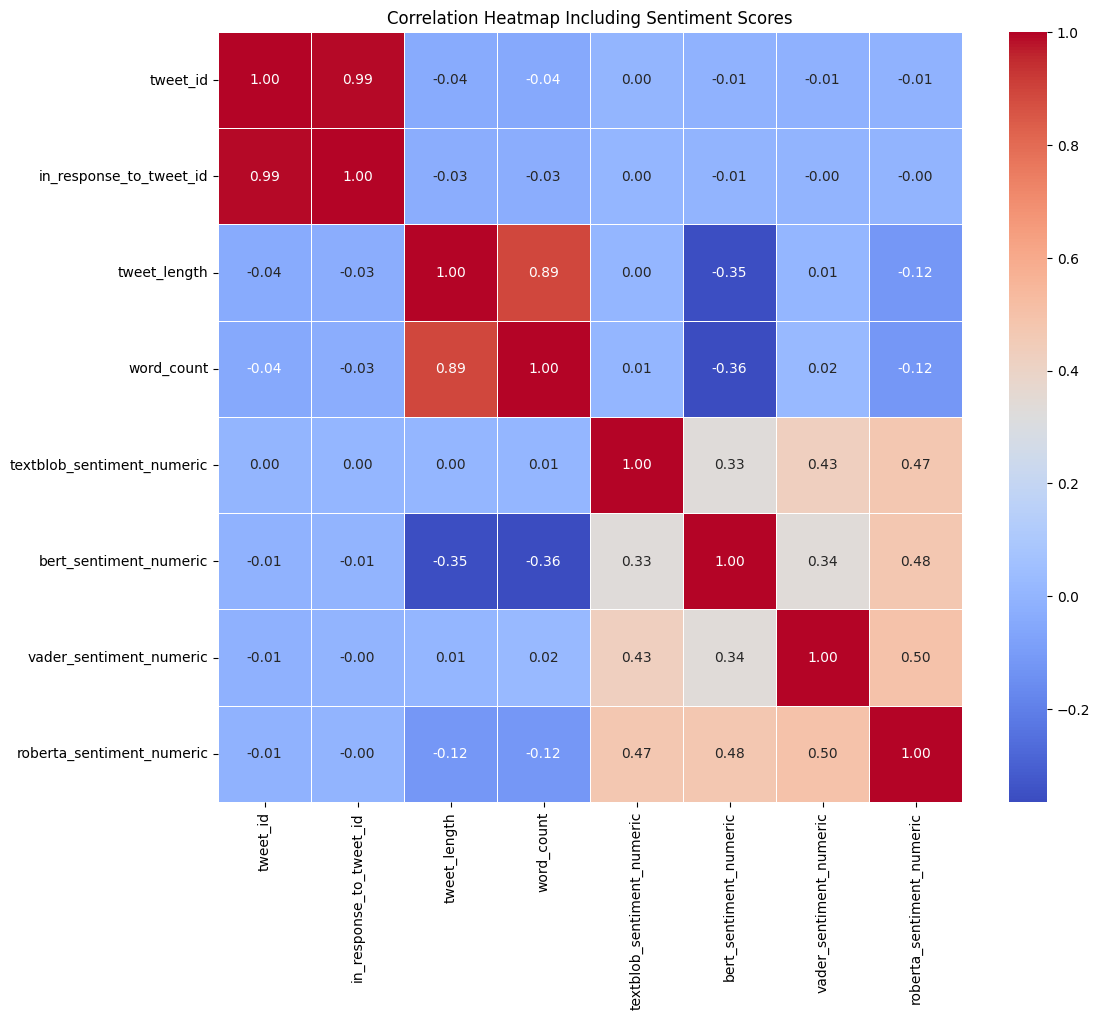

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert sentiment labels (POSITIVE, NEUTRAL, NEGATIVE) to numeric values for each model
sentiment_map = {'POSITIVE': 1, 'NEUTRAL': 0, 'NEGATIVE': -1}
df_subset['textblob_sentiment_numeric'] = df_subset['textblob_sentiment'].map(sentiment_map)
df_subset['bert_sentiment_numeric'] = df_subset['bert_sentiment'].map(sentiment_map)
df_subset['vader_sentiment_numeric'] = df_subset['vader_sentiment'].map(sentiment_map)
df_subset['roberta_sentiment_numeric'] = df_subset['roberta_sentiment'].map(sentiment_map)

numeric_df = df_subset.select_dtypes(include=['float64', 'int64']).copy()

numeric_df['textblob_sentiment_numeric'] = df_subset['textblob_sentiment_numeric']
numeric_df['bert_sentiment_numeric'] = df_subset['bert_sentiment_numeric']
numeric_df['vader_sentiment_numeric'] = df_subset['vader_sentiment_numeric']
numeric_df['roberta_sentiment_numeric'] = df_subset['roberta_sentiment_numeric']

corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap Including Sentiment Scores')
plt.show()